In [48]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns   
from datasets import load_dataset

ds=load_dataset('lukebarousse/data_jobs')
df=ds['train'].to_pandas()

df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda skill : ast.literal_eval(skill) if pd.notna(skill) else skill)

In [5]:
df_US=df[df['job_country']=='United States']

In [6]:
df_skills=df_US.explode('job_skills')

In [11]:
df_skills_count=df_skills.groupby(['job_skills','job_title_short']).size()

In [13]:
df_skills_count=df_skills_count.reset_index(name='skill_count')

In [37]:
df_skills_count.sort_values(by='skill_count',ascending=False,inplace=True)
df_job_title_count=df_US['job_title_short'].value_counts().reset_index(name='jobs_total')
df_job_title_count

,job_title_short,jobs_total
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


In [40]:
df_skill_perc=pd.merge(df_skills_count,df_job_title_count,how='left',on='job_title_short')
df_skill_perc['skill_perc']=100*(df_skill_perc['skill_count']/df_skill_perc['jobs_total'])


In [22]:
job_titles=df_skills_count['job_title_short'].unique().tolist()
job_titles=sorted(job_titles[:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

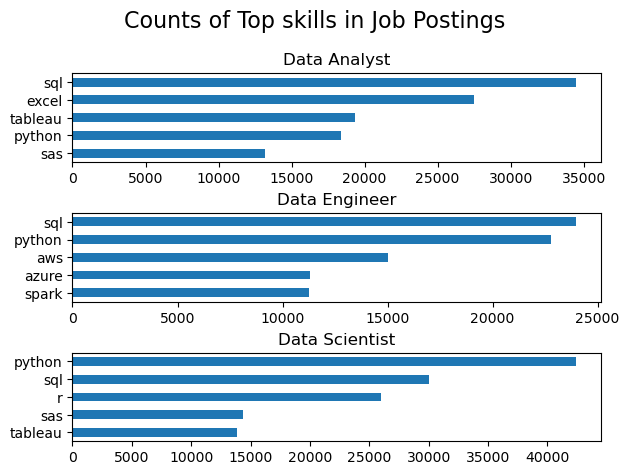

In [45]:
fig,ax=plt.subplots(len(job_titles),1)

for i,job_title in enumerate(job_titles):
    df_plot=df_skills_count[df_skills_count['job_title_short']==job_title].head()
    df_plot.plot(kind='barh',x='job_skills',y='skill_count',ax=ax[i],title=job_title,legend=False)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
fig.suptitle('Counts of Top skills in Job Postings',fontsize=16) 
fig.tight_layout(h_pad=0.5)
plt.show()   

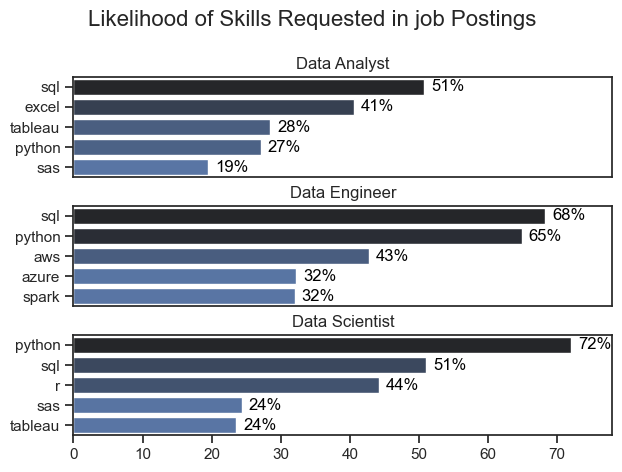

In [68]:
fig,ax=plt.subplots(len(job_titles),1)
sns.set_theme(style="ticks")
for i,job_title in enumerate(job_titles):
    df_plot=df_skill_perc[df_skill_perc['job_title_short']==job_title].head()
    # df_plot.plot(kind='barh',x='job_skills',y='skill_perc',ax=ax[i],title=job_title,legend=False)
    sns.barplot(data=df_plot,x='skill_perc',y='job_skills',ax=ax[i],hue='skill_perc',palette='dark:b_r',legend=False)
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].set_xlim(0,78)
    for n,v in enumerate(df_plot['skill_perc']):
        ax[i].text(v+1,n,f"{v:.0f}%",color='black',va='center')
       
    if i!=len(job_titles)-1:
      ax[i].set_xticks([]) 
fig.suptitle('Likelihood of Skills Requested in job Postings',fontsize=16) 
fig.tight_layout(h_pad=0.5)
plt.show()   